In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import sys
sys.path.append('../src/')
from random_graph import RandGraph
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
g = RandGraph()

In [24]:
g.actors

{b'1174baa8': <random_graph.Actor at 0x3b7ba58>,
 b'60aed1e1': <random_graph.Actor at 0x3b7b5c0>,
 b'a526d22c': <random_graph.Actor at 0x3b70b38>,
 b'765e09ed': <random_graph.Actor at 0xa791eb8>,
 b'568b24be': <random_graph.Actor at 0xa7914a8>}

In [25]:
for val in g.moving_actors.values():
    print(val.travel_time)

In [26]:
g.action(0,0)

(array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.14285714, 0.        , 0.        , 0.        ,
         0.        ]]), 0.0)

In [27]:
for val in g.moving_actors.values():
    print(val.travel_time)

1


In [28]:
g.action(0,0)

(array([[0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. ]]),
 0.9454545454545454)

In [29]:
for val in g.moving_actors.values():
    print(val.travel_time)

2
1
1


In [32]:
np.mean([v.travel_time for v in g.moving_actors.values()])

1.3333333333333333

### Reward

In [34]:
np.mean([len(v.path)/float(v.travel_time) for v in g.moving_actors.values()])

2.5

In [94]:
def reward(g):
    return np.mean([(len(v.path)-1)/float(v.travel_time) for v in g.moving_actors.values()])

In [128]:
g = RandGraph(actors=1000)

In [129]:
total_reward = []
for i in range(50):
    g.action(0,0)
    total_reward.append(reward(g))

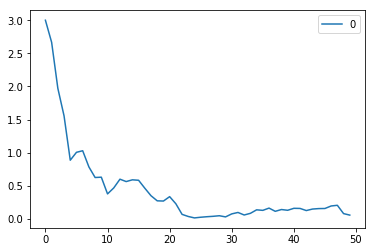

In [130]:
pd.DataFrame(total_reward).plot()
plt.show()